In [24]:
# Modelo Deep Learning que determina si una crítica cinematográfica es positiva o negativa
# Dataset: keras.IMDB

import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import models, layers
from keras.datasets import imdb

print("Cargando keras.IMDB")
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print("Hecho")

Cargando keras.IMDB
Hecho


In [25]:
# Vectorizar los datos
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [26]:
# Vectorizar las etiquetas
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

train_data
- Array numpy 1D con 25000 listas de enteros (int). Cada lista tiene un número variable de enteros.
- 25000 Críticas de película. Las palabras están codificadas como tokens.
- El valor de cada token corresponde al número de veces que la palabra aparece en el dataset completo

train_labels
- Array numpy 1D con 25000 enteros numpy (int64)

test_data
- Array numpy 1D con 25000 listas de enteros (int). Cada lista tiene un número variable de enteros
- 25000 Críticas de película. Las palabras están codificadas como tokens.
- El valor de cada token corresponde al número de veces que la palabra aparece en total

test_labels
- Array numpy 1D con 25000 enteros numpy (int64)

x_train
- Array numpy 2D (25000, 10000) de float64. Los valores son 0 ó 1 codificando los tokens
- Son los datos de entrenamiento (train_data)

y_train
- Array numpy 1D (25000,) de float 32. Los valores son 0 o 1 codificando la crítica (positiva o negativa)
- Son las etiquestas de entrenamiento (train_labels)

x_test
- Array numpy 2D (25000, 10000) de float64. Los valores son 0 ó 1 codificando los tokens
- Son los datos de comprobación del modelo (test_data)

y_test
- Array numpy 1D (25000,) de float 32. Los valores son 0 o 1 codificando la crítica (positiva o negativa)
- Son las etiquestas de comprobación del modelo (test_labels)

Python Slicing [start:stop]

In [27]:
# Divido las muestras y etiquetas de training en dos grupos
# 1 - 10.000     : x_val, y_val: 
# 10.000 - 25.000: partial_x_train, partial_y_train

# Muestras 0 - 10,000 de training -> Muestras de validación del entrenamiento
x_val = x_train[:10000]

# Muestras 10,000 - 25.000 de training -> Muestras de entrenamiento
partial_x_train = x_train[10000:]

# Etiquetas 0 - 10.000 de training -> Etiquetas de validación del entrenamiento
y_val = y_train[:10000]

# Etiquetas 10.000 - 25.000 de training -> Etiquetas de entrenamiento
partial_y_train = y_train[10000:]

In [28]:
# Definición del modelo
# Sequential model, the simplest type of Keras model
model = models.Sequential()

# Input_shape=10000: Especifica que cada muestra tiene 10000 características (1D array)
model.add(layers.Input(shape=(10000,)))

# Core of the model: 3 Dense layers

# units=16: This specifies there are 16 neurons in this layer
# Activation function for the neuron: 'relu'
model.add(layers.Dense(16, activation='relu'))

# units=16: This specifies there are 16 neurons in this layer
# Activation function for the neuron: 'relu'
model.add(layers.Dense(16, activation='relu'))

# units=1: This specifies there is 1 neuros in this layer
# Activation function for the neuron: 'sigmoid'
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

Datos de entrenamiento 15000 de los 25000 originales:
- partial_x_train: datos
- partial_y_train: etiquetas

Datos de validación 10000 de los 25000 originales:
- x_val: datos
- y_val: etiquetas

In [29]:
print("Entrenamiento del modelo")
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Entrenamiento del modelo
Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7595 - loss: 0.5351 - val_accuracy: 0.8585 - val_loss: 0.4025
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8865 - loss: 0.3336 - val_accuracy: 0.8855 - val_loss: 0.3128
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9157 - loss: 0.2482 - val_accuracy: 0.8877 - val_loss: 0.2851
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9320 - loss: 0.1986 - val_accuracy: 0.8884 - val_loss: 0.2756
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9442 - loss: 0.1670 - val_accuracy: 0.8780 - val_loss: 0.3099
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9555 - loss: 0.1403 - val_accuracy: 0.8793 - val_loss: 0.3026
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9628 - loss: 0.1224 - val_accuracy: 0.8814 - val_loss: 0.3086
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9696 - loss: 0.1062 -

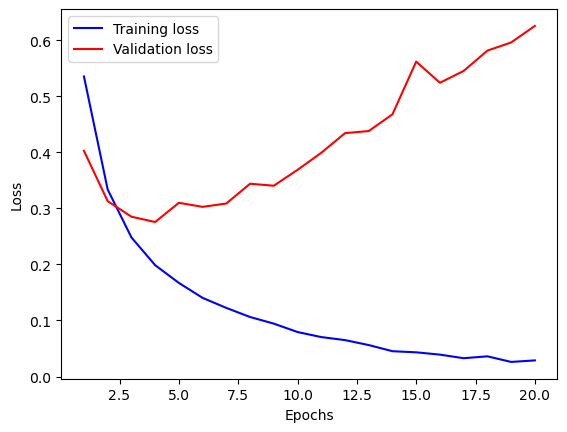

In [33]:
# Gráfica del resultado de la función de pérdida en los datos de entrenamiento y validación del entrenamiento
import matplotlib.pyplot as plt

history_dict = history.history

# La clave 'loss' devuelve una lista con los valores de la función de pérdida con los datos de apredizaje para cada epoch
loss_values = history_dict['loss']

# La clave 'val_loss' devuelve una lista con los valores de la función de pérdida con los datos de validación para cada epoch
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, color='blue', label='Training loss')
plt.plot(epochs, val_loss_values, color='red', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

En la epoch 4/5 (dependiendo de los valores aleatorios de inicio)
- El modelo alcanza el valor mínimo de la pérdida con los datos de validación

En la epoch 5/6 y siguientes
- La pérdida con los datos de validación aumenta
- La pérdida con oos datos de aprendizaje continua disminuyendo

Conclusión: 
- El modelo alcanza su mejor entrenamiento en la epoch 4/5. 
- A partir de ella, en las epoch 5/6 y posteriores se sobreentrena para adaptarse demasiado a los datos de entrenamiento

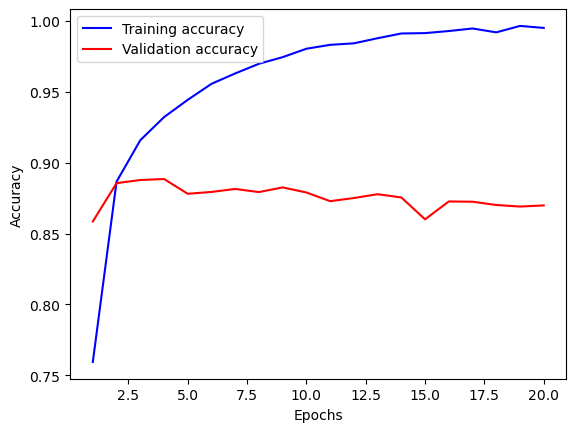

In [34]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, color='blue', label='Training accuracy')
plt.plot(epochs, val_acc, color='red', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.show()